<a href="https://colab.research.google.com/github/feranzie/NLP-analysis-of-books/blob/main/My_First_Years_As_A_Frenchwoman_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import base64
import numpy as np
import pandas as pd

# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Other imports
from pprint import pprint
from collections import Counter
# from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import ngrams, FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

import re
from gensim.summarization import summarize
from gensim.summarization import keywords
import spacy
import seaborn as sns
##print "all imports worked nicely"
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [ ]:
# opening the text file and reading it's contents and removing empty lines.
txt=[]
with open("/content/100031.txt","r") as f:
 for i in f.readlines():
       if not i.strip():
           continue
       if i:
         txt.append(i)

In [ ]:
#select important parts of book
txt=txt[70:5479]

In [ ]:
text = ''.join(str(e) for e in txt)

# group book into chapters

In [ ]:

import re
chapters = re.split("Chapter ", text, flags = re.IGNORECASE) #Finds all the chapter markers in the book and makes a list of all the chapters
chapters.pop(0) # Removes the first item in list as this is ""


'MY FIRST YEARS AS A FRENCHWOMAN\n'

In [ ]:
len(chapters)

11

# Create list for chapter numbering

In [ ]:
number=[]
for i in chapters:
 number.append(chapters.index(i))
no = [x+1 for x in number]

# convert to dataframe

In [ ]:
df = pd.DataFrame(
    {'chapter': no,
     'content': chapters,
    })

In [ ]:
df

,chapter,content
0,1,\nWHEN MACMAHON WAS PRESIDENT\nI was married i...
1,2,\nIMPRESSIONS OF THE ASSEMBLY AT VERSAILLES\nT...
2,3,\nM. WADDINGTON AS MINISTER OF PUBLIC INSTRUCT...
3,4,\nTHE SOCIAL SIDE OF A MINISTER'S WIFE\nMy fir...
4,5,\nA REPUBLICAN VICTORY AND A NEW MINISTRY\nThe...
5,6,\nTHE EXPOSITION YEAR\nThe big political dinne...
6,7,\nTHE BERLIN CONGRESS\nSeventy-eight was a mos...
7,8,\nGAIETIES AT THE QUAI D'ORSAY\nW. got home on...
8,9,\nM. WADDINGTON AS PRIME MINISTER\nThere had b...
9,10,\nPARLIAMENT BACK IN PARIS\nThe question of th...


# Lower case words

In [ ]:
df['cleaned']=df['content'].apply(lambda x: x.lower())

# Remove digits and words containing digits

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\n','', x))

# Remove Punctuations

In [ ]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
df.head()

,chapter,content,cleaned
0,1,\nWHEN MACMAHON WAS PRESIDENT\nI was married i...,when macmahon was presidenti was married in pa...
1,2,\nIMPRESSIONS OF THE ASSEMBLY AT VERSAILLES\nT...,impressions of the assembly at versaillesthe s...
2,3,\nM. WADDINGTON AS MINISTER OF PUBLIC INSTRUCT...,m. waddington as minister of public instructio...
3,4,\nTHE SOCIAL SIDE OF A MINISTER'S WIFE\nMy fir...,the social side of a minister's wifemy first b...
4,5,\nA REPUBLICAN VICTORY AND A NEW MINISTRY\nThe...,a republican victory and a new ministrythe ele...


# Word Distribution
Chapterwise word distribution. WordClouds - show most frequently occuring words, with higher frequency words corelating to high font size. Generating wordCloud showing the most frequently occurring words per Chapter.

In [ ]:
word_count = np.zeros(11)
chapter = 0

for text in df['cleaned']:
    count = text.split()
    word_count[chapter] = len(count)
    chapter = chapter + 1

# getting word count for individual chapters
print (word_count)

[2646. 3593. 3289. 4545. 4867. 6844. 4586. 4097. 6908. 7580. 6898.]


In [ ]:
df['WordCount'] = word_count.tolist()

In [ ]:
#type of features
df.dtypes

chapter        int64
content       object
cleaned       object
WordCount    float64
dtype: object

In [ ]:
#number of missing features
df.isna().sum()

chapter      0
content      0
cleaned      0
WordCount    0
dtype: int64

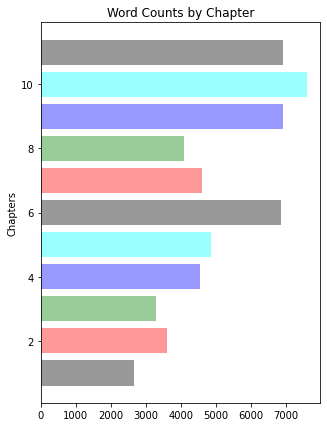

,chapter,content,cleaned,WordCount
0,1,\nWHEN MACMAHON WAS PRESIDENT\nI was married i...,when macmahon was presidenti was married in pa...,2646.0
1,2,\nIMPRESSIONS OF THE ASSEMBLY AT VERSAILLES\nT...,impressions of the assembly at versaillesthe s...,3593.0
2,3,\nM. WADDINGTON AS MINISTER OF PUBLIC INSTRUCT...,m. waddington as minister of public instructio...,3289.0
3,4,\nTHE SOCIAL SIDE OF A MINISTER'S WIFE\nMy fir...,the social side of a minister's wifemy first b...,4545.0
4,5,\nA REPUBLICAN VICTORY AND A NEW MINISTRY\nThe...,a republican victory and a new ministrythe ele...,4867.0
5,6,\nTHE EXPOSITION YEAR\nThe big political dinne...,the exposition yearthe big political dinners w...,6844.0
6,7,\nTHE BERLIN CONGRESS\nSeventy-eight was a mos...,the berlin congressseventy-eight was a most im...,4586.0
7,8,\nGAIETIES AT THE QUAI D'ORSAY\nW. got home on...,gaieties at the quai d'orsayw. got home on the...,4097.0
8,9,\nM. WADDINGTON AS PRIME MINISTER\nThere had b...,m. waddington as prime ministerthere had been ...,6908.0
9,10,\nPARLIAMENT BACK IN PARIS\nThe question of th...,parliament back in paristhe question of the re...,7580.0


In [ ]:
# import matplotlib as mpl
# # Just making the plots look better
# mpl.style.use('ggplot')

my_colors = 'rgbkymc'

plt.figure(figsize=(5,7))
# plt.rcParams["figure.figsize"] = [16,9]
plt.ylabel('Chapters')
plt.title('Word Counts by Chapter')

# plt.bar(df.WordCount, df.ChapterName)
opacity = 0.4

plt.barh(df.chapter, df.WordCount, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
# plt.barh(df.ChapterName, df.WordCount, color= my_colors)

plt.show()


# df = df.drop('wordCount', 1)


df.head(30)

In [ ]:
#create list of strings for numbering below graph
g=list(range(1, 28))
q=[]
for i in g:
  q.append(str(i))


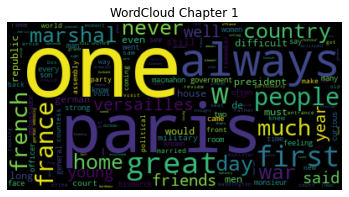

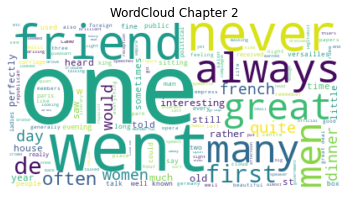

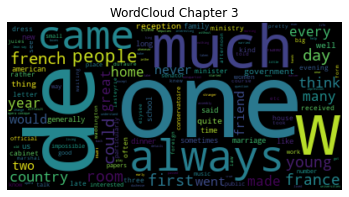

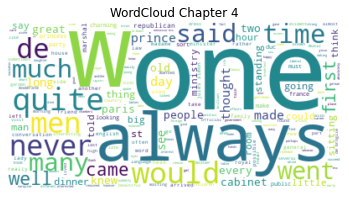

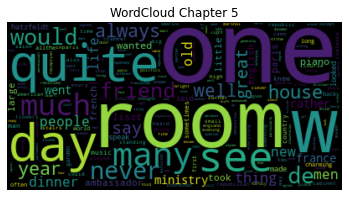

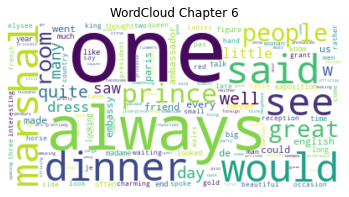

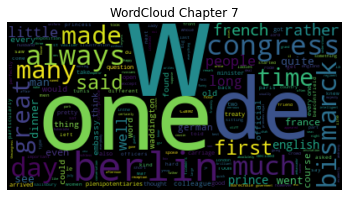

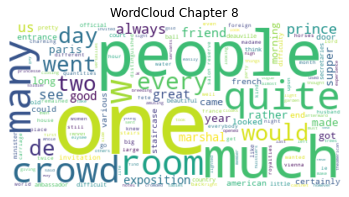

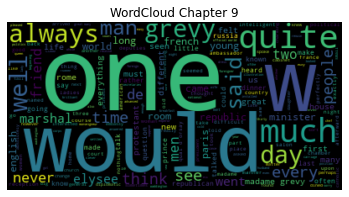

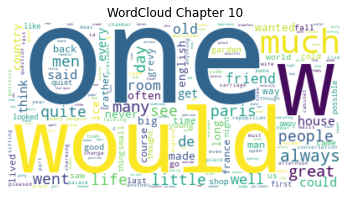

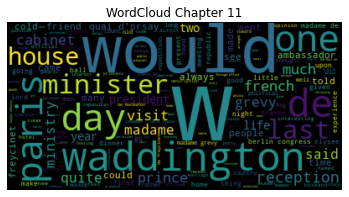

In [ ]:
# WordClouds - show most frequently occuring words, with higher frequency words corelating to high font size
# generating wordCloud showing the most frequently occurring words per Chapter 
color_flag = True
chapter_count = 0
for text in df['cleaned']:
    if color_flag:
        wordcloud = WordCloud(stopwords=stop_words).generate(text)
    else:
        wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)
    # Display the generated image:
    plt.title("WordCloud Chapter " + (q)[chapter_count])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    color_flag = not color_flag
    chapter_count = chapter_count + 1


# Phrase Distribution
Performing Phrase distribution(s) throughout the whole book and then for individual Chapter(s).

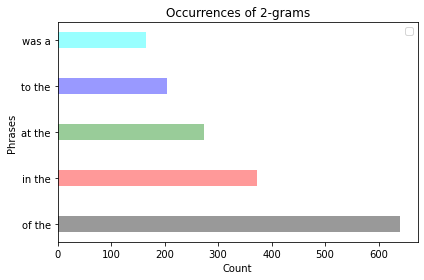

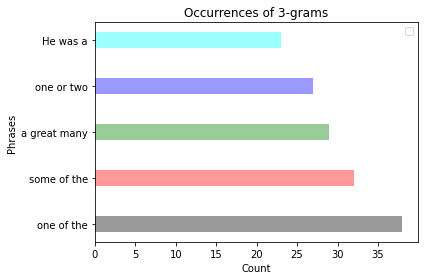

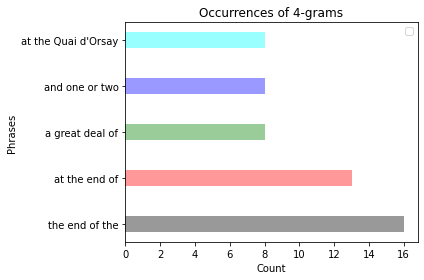

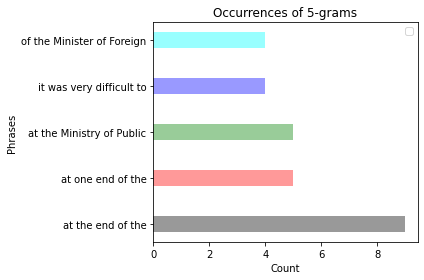

In [ ]:
# data = df['cleaned'][0]

# Phrase distribution(s) throughout the whole book
data = ''.join(txt)
all_counts = dict()
# counting till n-grams, n ranging from 2..5 
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    fig, ax = plt.subplots()

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()

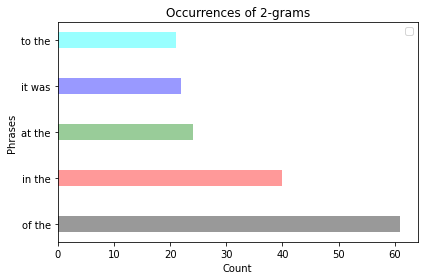

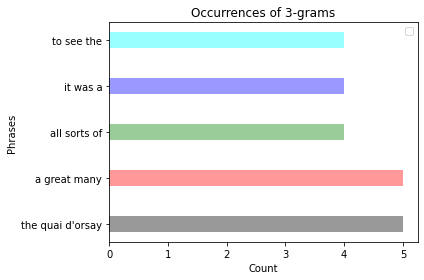

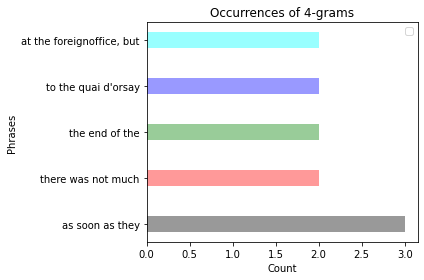

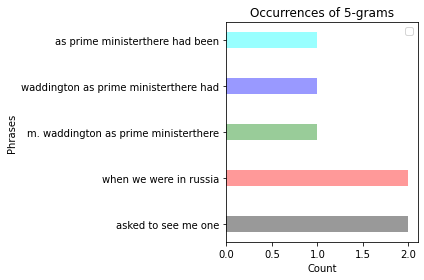

In [ ]:

# Phrase distribution(s) throughout individual Chapters, eg. Chapter 1 
data = df['cleaned'][8]
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()


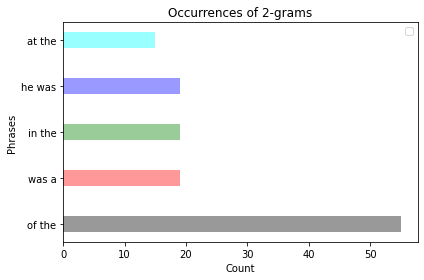

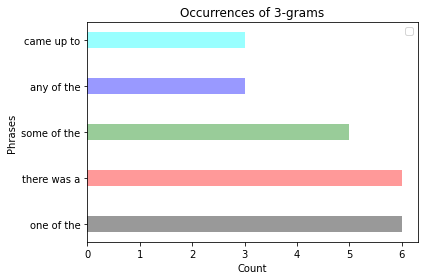

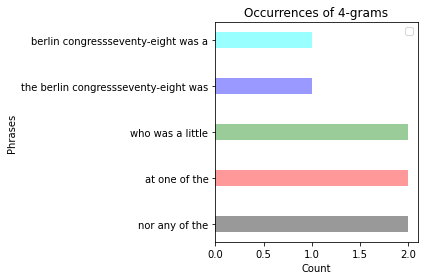

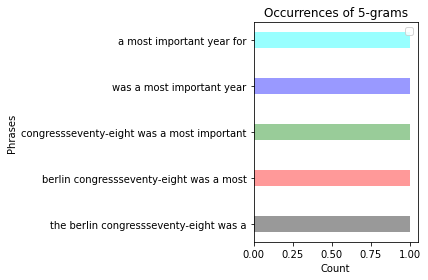

In [ ]:
# Phrase distribution(s) throughout individual Chapters, eg. Chapter 1 
data = df['cleaned'][6]
all_counts = dict()
for size in 2, 3, 4, 5:
    all_counts[size] = FreqDist(ngrams(data.split(), size))


for count in 2, 3, 4, 5:
    data = all_counts[count].most_common(5)
    phrase_count = [x[1] for x in data]
    phrase_content = [' '.join(x[0]) for x in data]

    bar_width = 0.35
    opacity = 0.4

    plt.barh(phrase_content, phrase_count, bar_width, alpha = opacity, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.xlabel('Count')
    plt.ylabel('Phrases')
    plt.title('Occurrences of %s-grams' % count)
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def tokenize_and_stopWordsRemoval(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation) and words whose length is less than 2 characters - removes 
 #formating from data 
    for token in tokens:
        if re.search('[a-zA-Z]', token) and len(token) > 2 and token not in stop_words :
            filtered_tokens.append(token)
    return filtered_tokens

#tokenize
%time tokenized_text = [tokenize_and_stopWordsRemoval(text) for text in txt]


CPU times: user 1.22 s, sys: 0 ns, total: 1.22 s
Wall time: 1.23 s


In [ ]:
print (len(tokenized_text))
print (tokenized_text[30])
print (txt[30])

5409
['time', 'feel', 'home', 'new', 'milieu', 'Political', 'feeling']
me some time to feel at home in my new milieu. Political feeling was



# Name and Place Identification
This can be achieved by Named Entity Recognition (NER). Here I first utilize Spacy for this purpose but after seeing quiet a few exceptions in the results, I have also shown the same task using NLTK's NER. Top 10 results for both the categories(Name of people and places) are shown below.

In [ ]:

import spacy
nlp = spacy.load("en_core_web_sm")

doc_str = ""
for item in tokenized_text:
    doc_str = doc_str + " " + " ".join(item)
doc = nlp(doc_str)   
print (type(doc))

list_person = []
list_place = []

for X in doc.ents:
    if (X.label_ == u'PERSON'):
        list_person.append((X.text, X.label_))
    elif (X.label_ == u'GPE')| (X.label_ == u'LOC') :
        list_place.append((X.text, X.label_))

# Set operation on lists to remove the duplicate entries
list_person = list(set(list_person))
list_place = list(set(list_place))

#printing first 10 items in each category
print (list_person[:10])
print (list_place[:10])

<class 'spacy.tokens.doc.Doc'>
[('Bourneville Wales Prince', 'PERSON'), ('Andre Alfred Annamites', 'PERSON'), ('Wolseley', 'PERSON'), ('Andrassy Count Berlin Congress', 'PERSON'), ('Decazes Duc', 'PERSON'), ('Frederick', 'PERSON'), ('Rufus King', 'PERSON'), ('Queen Alexandra', 'PERSON'), ('Comte St. Vallier', 'PERSON'), ('Franz von Lenbach', 'PERSON')]
[('Berlin', 'GPE'), ('Algiers', 'LOC'), ('Second Empire', 'GPE'), ('St. Petersburg', 'GPE'), ('Bulgaria', 'GPE'), ('Greece', 'GPE'), ('West', 'LOC'), ('Croizette', 'GPE'), ('Scotland', 'GPE'), ('Rouen', 'GPE')]


In [ ]:
nltk_personList = []
nltk_placeList = []

import nltk
for sent in nltk.sent_tokenize(doc_str):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            if (chunk.label() == 'PERSON'):
                nltk_personList.append((chunk.label(), ' '.join(c[0] for c in chunk)))
            elif (chunk.label() == 'GPE'):
                nltk_placeList.append((chunk.label(), ' '.join(c[0] for c in chunk)))

# Set operation on lists to remove the duplicate entries
nltk_personList = list(set(nltk_personList))
nltk_placeList = list(set(nltk_placeList))

# printing first 10 items in each category
print (nltk_personList[:10])
print (nltk_placeList[:10])


[('PERSON', 'French English'), ('PERSON', 'Berlin Congress French'), ('PERSON', 'Orloff Russian'), ('PERSON', 'Paris Empire'), ('PERSON', 'August'), ('PERSON', 'Archbishops'), ('PERSON', 'Adams Sir Francis'), ('PERSON', 'Prince Denmark'), ('PERSON', 'Madeleine King Italy Victor Emmanuel'), ('PERSON', 'Illustration Theodor Mommsen')]
[('GPE', 'Prince'), ('GPE', 'Russian'), ('GPE', 'St. Petersburg'), ('GPE', 'British'), ('GPE', 'Quite'), ('GPE', 'England'), ('GPE', 'German'), ('GPE', 'Parisian'), ('GPE', 'Moscow'), ('GPE', 'Orleans')]
